In [1]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
plt.rcParams.update({'font.size':15})

In [2]:
df = pd.read_csv('../data/lmc_all_cepheids', delim_whitespace=True, names=('star_ID', 'period', 'mag_1', 'err_mag_1', 'mag_2', 'err_mag_2', 'colour', 'err_colour'))

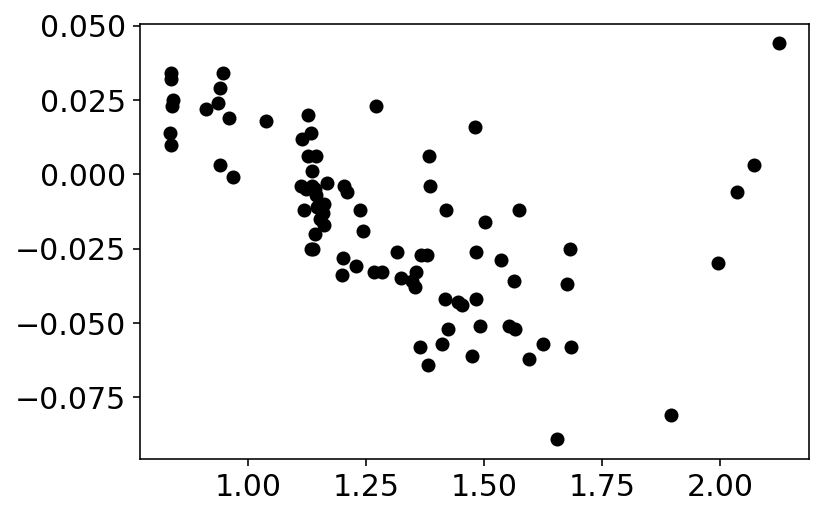

In [3]:
plt.plot(np.log10(df.period), df.colour, 'ko', ls='None')

In [4]:
df.to_csv('../data/LMC_Cepheids.csv', header=True, index=False, float_format='%.3f')

In [5]:
df

,star_ID,period,mag_1,err_mag_1,mag_2,err_mag_2,colour,err_colour
0,HV00872,29.820,11.320,0.005,11.381,0.005,-0.061,0.002
1,HV00873,34.426,10.872,0.006,10.903,0.006,-0.029,0.002
2,HV00875,30.338,11.094,0.003,11.077,0.003,0.016,0.001
3,HV00876,22.716,11.558,0.006,11.592,0.007,-0.033,0.002
4,HV00877,45.155,10.701,0.004,10.790,0.004,-0.089,0.002
...,...,...,...,...,...,...,...,...
80,HV12724,13.744,12.419,0.004,12.444,0.005,-0.025,0.002
81,HV12815,26.135,11.212,0.006,11.257,0.006,-0.042,0.002
82,HV12816,9.108,12.890,0.011,12.869,0.011,0.019,0.002
83,HV13048,6.853,13.165,0.011,13.152,0.013,0.010,0.005


In [6]:
lc = pd.read_csv('../data/HV872.phot', delim_whitespace=True, names=('MJD', 'mag_1', 'err_mag_1', 'mag_2', 'err_mag_2'), header=1)

In [7]:
lc

,MJD,mag_1,err_mag_1,mag_2,err_mag_2
0,55134.756,11.568,0.013,11.605,0.014
1,55136.253,11.510,0.013,11.498,0.013
2,55136.953,11.485,0.012,11.471,0.014
3,55138.621,11.396,0.013,11.372,0.013
4,55139.561,11.378,0.012,11.330,0.013
5,55140.963,11.334,0.011,11.296,0.013
6,55141.986,11.268,0.011,11.276,0.012
7,55143.049,11.244,0.012,11.255,0.012
8,55144.443,11.205,0.011,11.235,0.013
9,55146.159,11.182,0.011,11.232,0.012


In [8]:
lc['phase'] = lc.MJD / 29.820 - np.floor(lc.MJD / 29.820)

In [9]:
lc

,MJD,mag_1,err_mag_1,mag_2,err_mag_2,phase
0,55134.756,11.568,0.013,11.605,0.014,0.918712
1,55136.253,11.510,0.013,11.498,0.013,0.968913
2,55136.953,11.485,0.012,11.471,0.014,0.992388
3,55138.621,11.396,0.013,11.372,0.013,0.048323
4,55139.561,11.378,0.012,11.330,0.013,0.079846
5,55140.963,11.334,0.011,11.296,0.013,0.126861
6,55141.986,11.268,0.011,11.276,0.012,0.161167
7,55143.049,11.244,0.012,11.255,0.012,0.196814
8,55144.443,11.205,0.011,11.235,0.013,0.243561
9,55146.159,11.182,0.011,11.232,0.012,0.301107


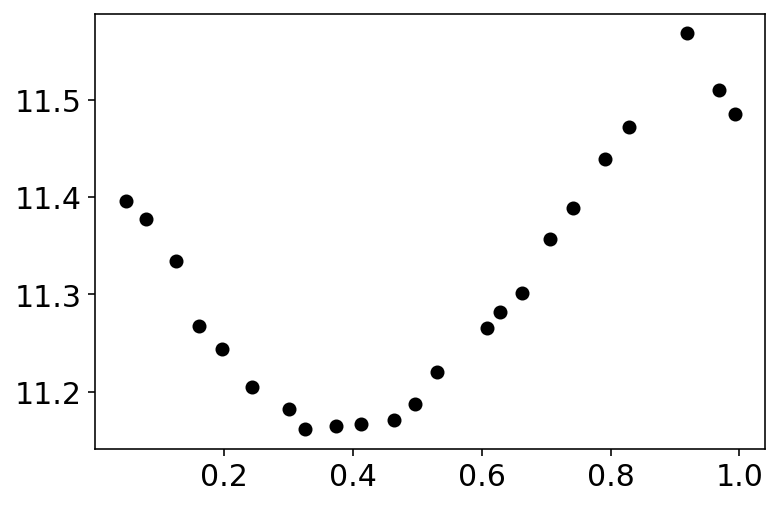

In [10]:
plt.plot(lc.phase, lc.mag_1, 'ko', ls='None')

In [11]:
def curve(x, amp, mean, shift):
    mag = mean + amp*np.sin(x*2*np.pi + shift)
    return(mag)

In [12]:
popt, pcov = curve_fit(curve, lc.phase, lc.mag_1)
amp = popt[0]
mean = popt[1]
shift = popt[2]

In [13]:
print(amp, mean, shift)

0.1746621346698121 11.317407133573802 2.2014117984339383


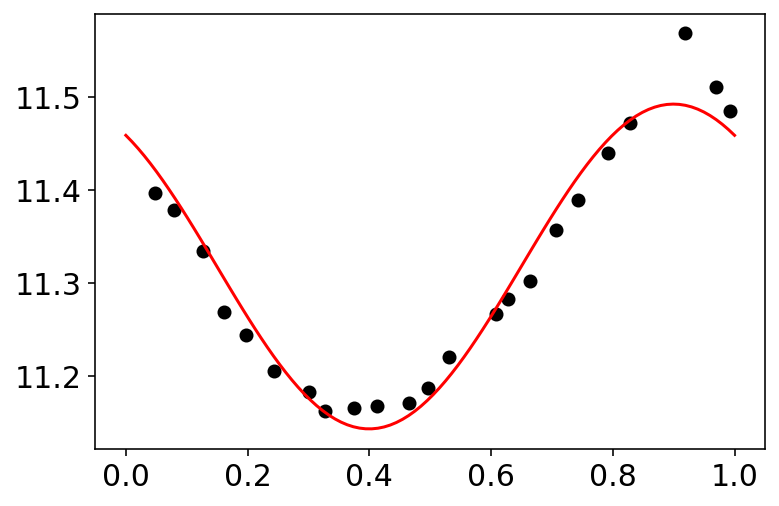

In [14]:
plt.plot(lc.phase, lc.mag_1, 'ko', ls='None')


ph = np.linspace(0,1,100)

plt.plot(ph, curve(ph, amp, mean, shift), 'r-')

In [15]:
lc.to_csv('../data/HV00872_phot.csv', columns=('phase', 'mag_1', 'err_mag_1', 'mag_2', 'err_mag_2'), header=True, index=False, float_format='%.3f')

In [16]:
lc = pd.read_csv('../data/HV873.phot', delim_whitespace=True, names=('MJD', 'mag_1', 'err_mag_1', 'mag_2', 'err_mag_2'), header=1)
lc['phase'] = lc.MJD / 34.426 - np.floor(lc.MJD / 34.426)
lc.to_csv('../data/HV00873_phot.csv', columns=('phase', 'mag_1', 'err_mag_1', 'mag_2', 'err_mag_2'), header=True, index=False, float_format='%.3f')

In [17]:
lc = pd.read_csv('../data/HV875.phot', delim_whitespace=True, names=('MJD', 'mag_1', 'err_mag_1', 'mag_2', 'err_mag_2'), header=1)
lc['phase'] = lc.MJD / 30.338 - np.floor(lc.MJD / 30.338)
lc.to_csv('../data/HV00875_phot.csv', columns=('phase', 'mag_1', 'err_mag_1', 'mag_2', 'err_mag_2'), header=True, index=False, float_format='%.3f')

In [18]:
lc = pd.read_csv('../data/HV876.phot', delim_whitespace=True, names=('MJD', 'mag_1', 'err_mag_1', 'mag_2', 'err_mag_2'), header=1)
lc['phase'] = lc.MJD / 22.716 - np.floor(lc.MJD / 22.716)
lc.to_csv('../data/HV00876_phot.csv', columns=('phase', 'mag_1', 'err_mag_1', 'mag_2', 'err_mag_2'), header=True, index=False, float_format='%.3f')

In [19]:
lc = pd.read_csv('../data/HV877.phot', delim_whitespace=True, names=('MJD', 'mag_1', 'err_mag_1', 'mag_2', 'err_mag_2'), header=1)
lc['phase'] = lc.MJD / 45.155 - np.floor(lc.MJD / 45.155)
lc.to_csv('../data/HV00877_phot.csv', columns=('phase', 'mag_1', 'err_mag_1', 'mag_2', 'err_mag_2'), header=True, index=False, float_format='%.3f')

In [20]:
popt, pcov = curve_fit(curve, lc.phase, lc.mag_1)
amp = popt[0]
mean = popt[1]
shift = popt[2]

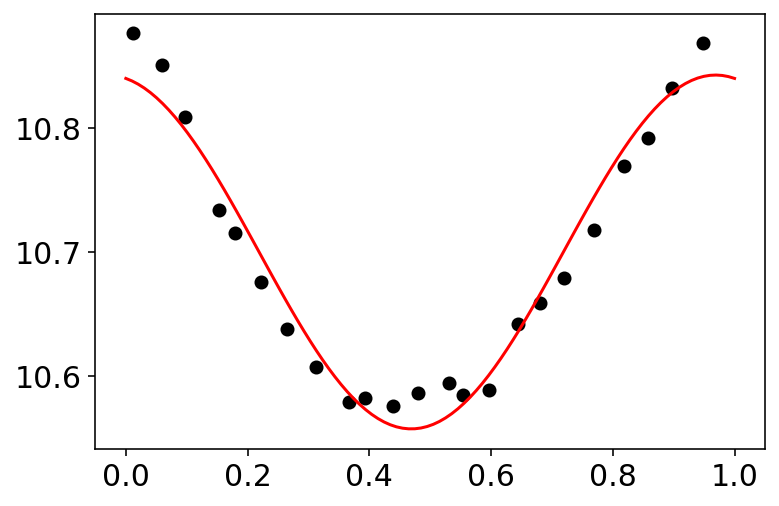

In [21]:
plt.plot(lc.phase, lc.mag_1, 'ko', ls='None')


ph = np.linspace(0,1,100)

plt.plot(ph, curve(ph, amp, mean, shift), 'r-')

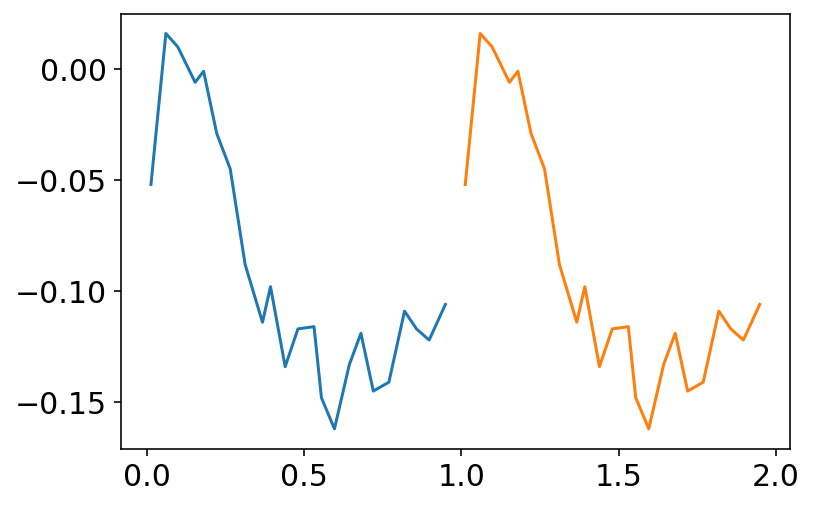

In [22]:
plt.plot(lc.phase, lc.mag_1 - lc.mag_2)
plt.plot(lc.phase+1, lc.mag_1 - lc.mag_2)

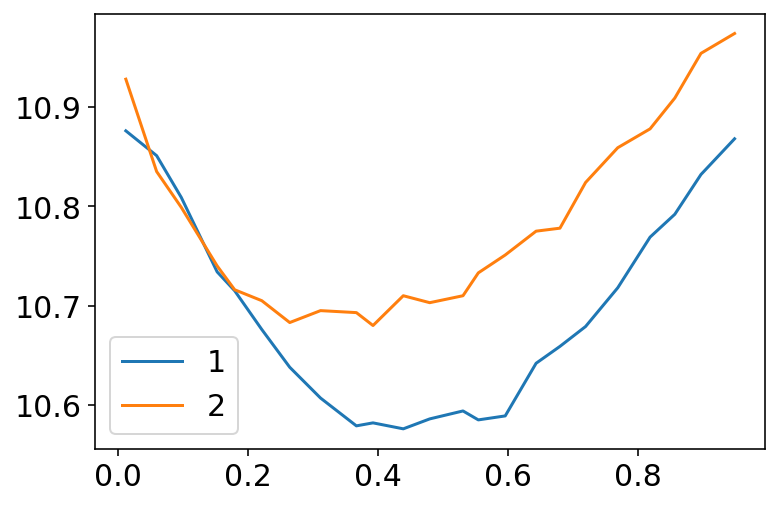

In [23]:
plt.plot(lc.phase, lc.mag_1,label='1')
plt.plot(lc.phase, lc.mag_2, label='2')
plt.legend()

In [24]:
lmc_df = pd.read_csv('../data/LMC_Cepheids.csv')

In [25]:
lmc_df

,star_ID,period,mag_1,err_mag_1,mag_2,err_mag_2,colour,err_colour
0,HV00872,29.820,11.320,0.005,11.381,0.005,-0.061,0.002
1,HV00873,34.426,10.872,0.006,10.903,0.006,-0.029,0.002
2,HV00875,30.338,11.094,0.003,11.077,0.003,0.016,0.001
3,HV00876,22.716,11.558,0.006,11.592,0.007,-0.033,0.002
4,HV00877,45.155,10.701,0.004,10.790,0.004,-0.089,0.002
...,...,...,...,...,...,...,...,...
80,HV12724,13.744,12.419,0.004,12.444,0.005,-0.025,0.002
81,HV12815,26.135,11.212,0.006,11.257,0.006,-0.042,0.002
82,HV12816,9.108,12.890,0.011,12.869,0.011,0.019,0.002
83,HV13048,6.853,13.165,0.011,13.152,0.013,0.010,0.005


In [26]:
def log_p_mag(p, a, b):
    mag = a * np.log10(p) + b
    return(mag)

In [27]:
popt, pcov = curve_fit(log_p_mag, lmc_df['period'], lmc_df['mag_1'])

a = popt[0]
b = popt[1]

err_a = np.sqrt(pcov[0][0])
err_b = np.sqrt(pcov[1][1])

print("a = {0:.3f} +/- {1:.3f}".format(a, err_a))
print("b = {0:.3f} +/- {1:.3f}".format(b, err_b))

a = -3.145 +/- 0.052
b = 15.817 +/- 0.069


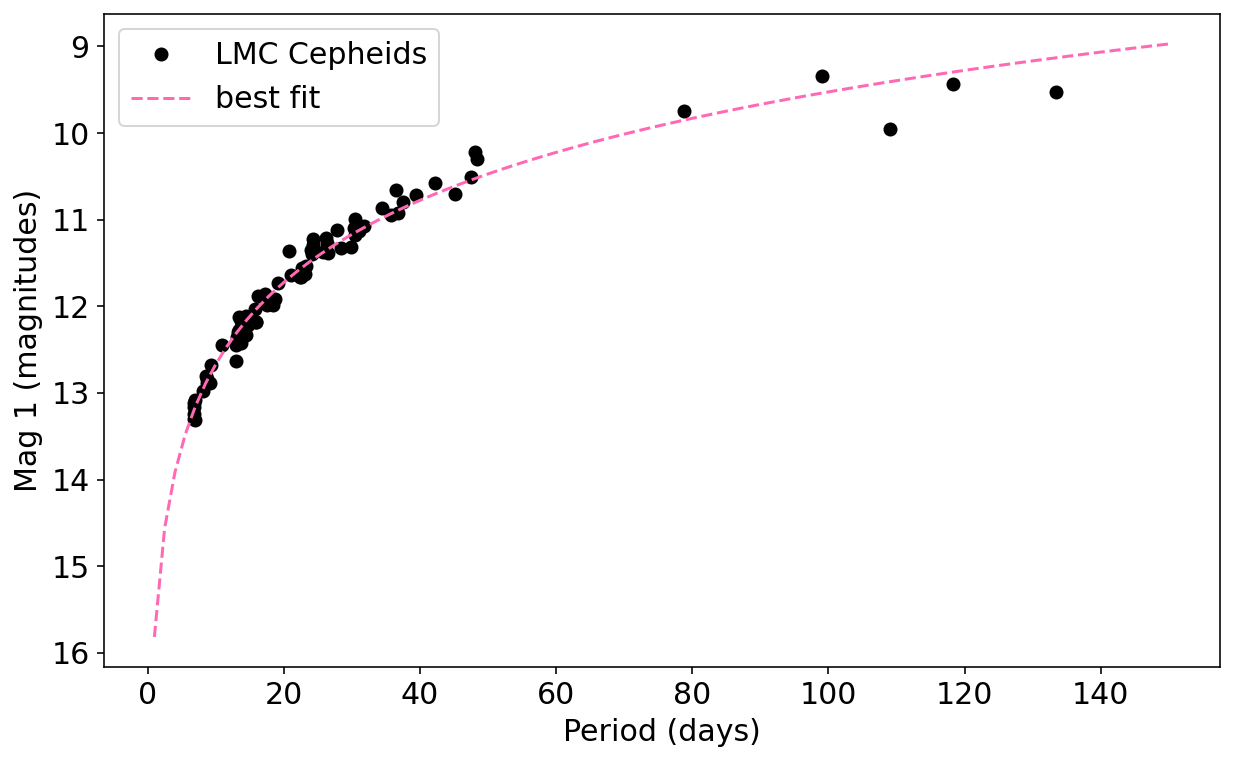

In [28]:
fig2 = plt.figure(figsize=(10,6))
ax2 = fig2.add_subplot(1,1,1)

ax2.plot(lmc_df['period'], lmc_df['mag_1'], color='k', marker='o', linestyle='None', label='LMC Cepheids')

p = np.linspace(1, 150, 100)

ax2.plot(p, log_p_mag(p, a, b), color='hotpink', ls='--', label='best fit')

ax2.set_xlabel('Period (days)')
ax2.set_ylabel('Mag 1 (magnitudes)')
ax2.legend()
ax2.invert_yaxis()
plt.show()



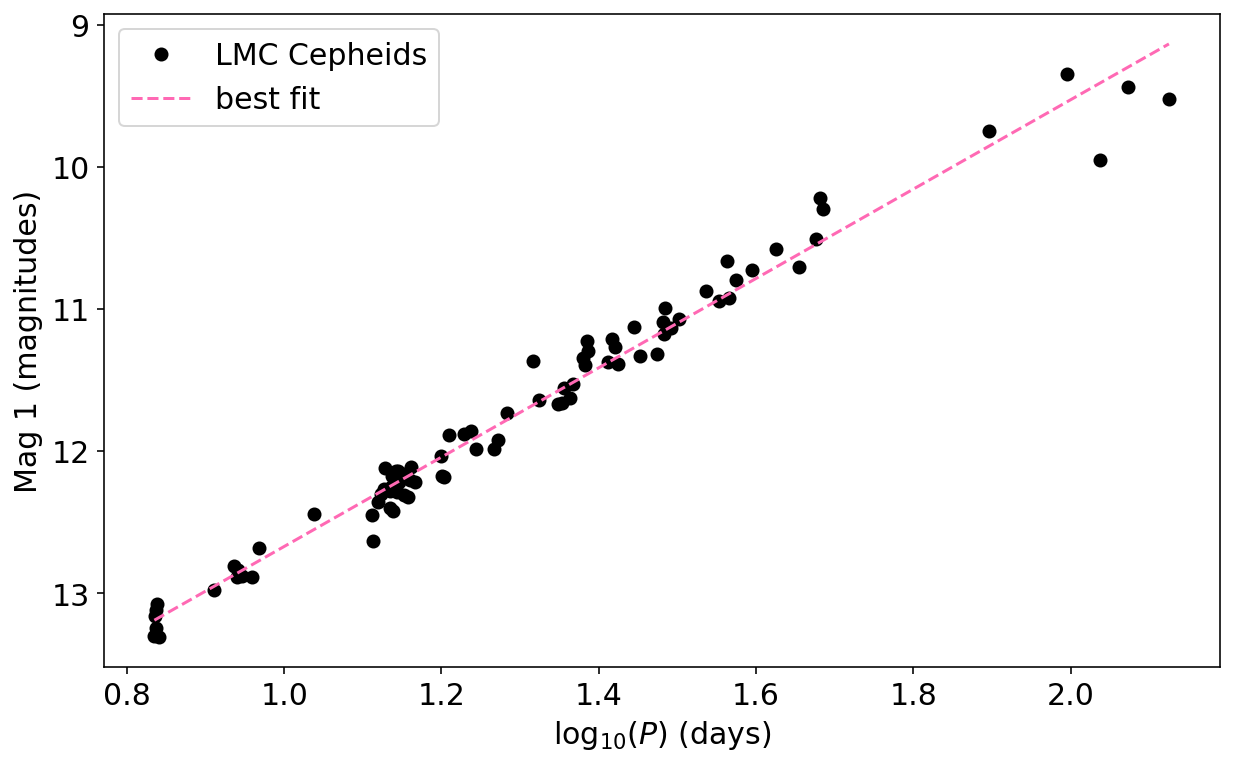

In [29]:
fig3 = plt.figure(figsize=(10,6))
ax3 = fig3.add_subplot(1,1,1)

ax3.plot(np.log10(lmc_df['period']), lmc_df['mag_1'], color='k', marker='o', linestyle='None', label='LMC Cepheids')

p = np.linspace(lmc_df['period'].min(), lmc_df['period'].max(), 100)

ax3.plot(np.log10(p), log_p_mag(p, a, b), color='hotpink', ls='--', label='best fit')

ax3.set_xlabel('$\log_{10}(P)$ (days)')
ax3.set_ylabel('Mag 1 (magnitudes)')
ax3.legend()
ax3.invert_yaxis()
plt.show()



In [30]:
popt, pcov = curve_fit(log_p_mag, lmc_df['period'], lmc_df['mag_1'])

a1 = popt[0]
b1 = popt[1]

err_a1 = np.sqrt(pcov[0][0])
err_b1 = np.sqrt(pcov[1][1])

print("a = {0:.3f} +/- {1:.3f}".format(a1, err_a))
print("b = {0:.3f} +/- {1:.3f}".format(b1, err_b))

a = -3.145 +/- 0.052
b = 15.817 +/- 0.069


In [31]:
popt, pcov = curve_fit(log_p_mag, lmc_df['period'], lmc_df['mag_2'])

a2 = popt[0]
b2 = popt[1]

err_a2 = np.sqrt(pcov[0][0])
err_b2 = np.sqrt(pcov[1][1])

print("a = {0:.3f} +/- {1:.3f}".format(a2, err_a2))
print("b = {0:.3f} +/- {1:.3f}".format(b2, err_b2))

a = -3.089 +/- 0.051
b = 15.761 +/- 0.068


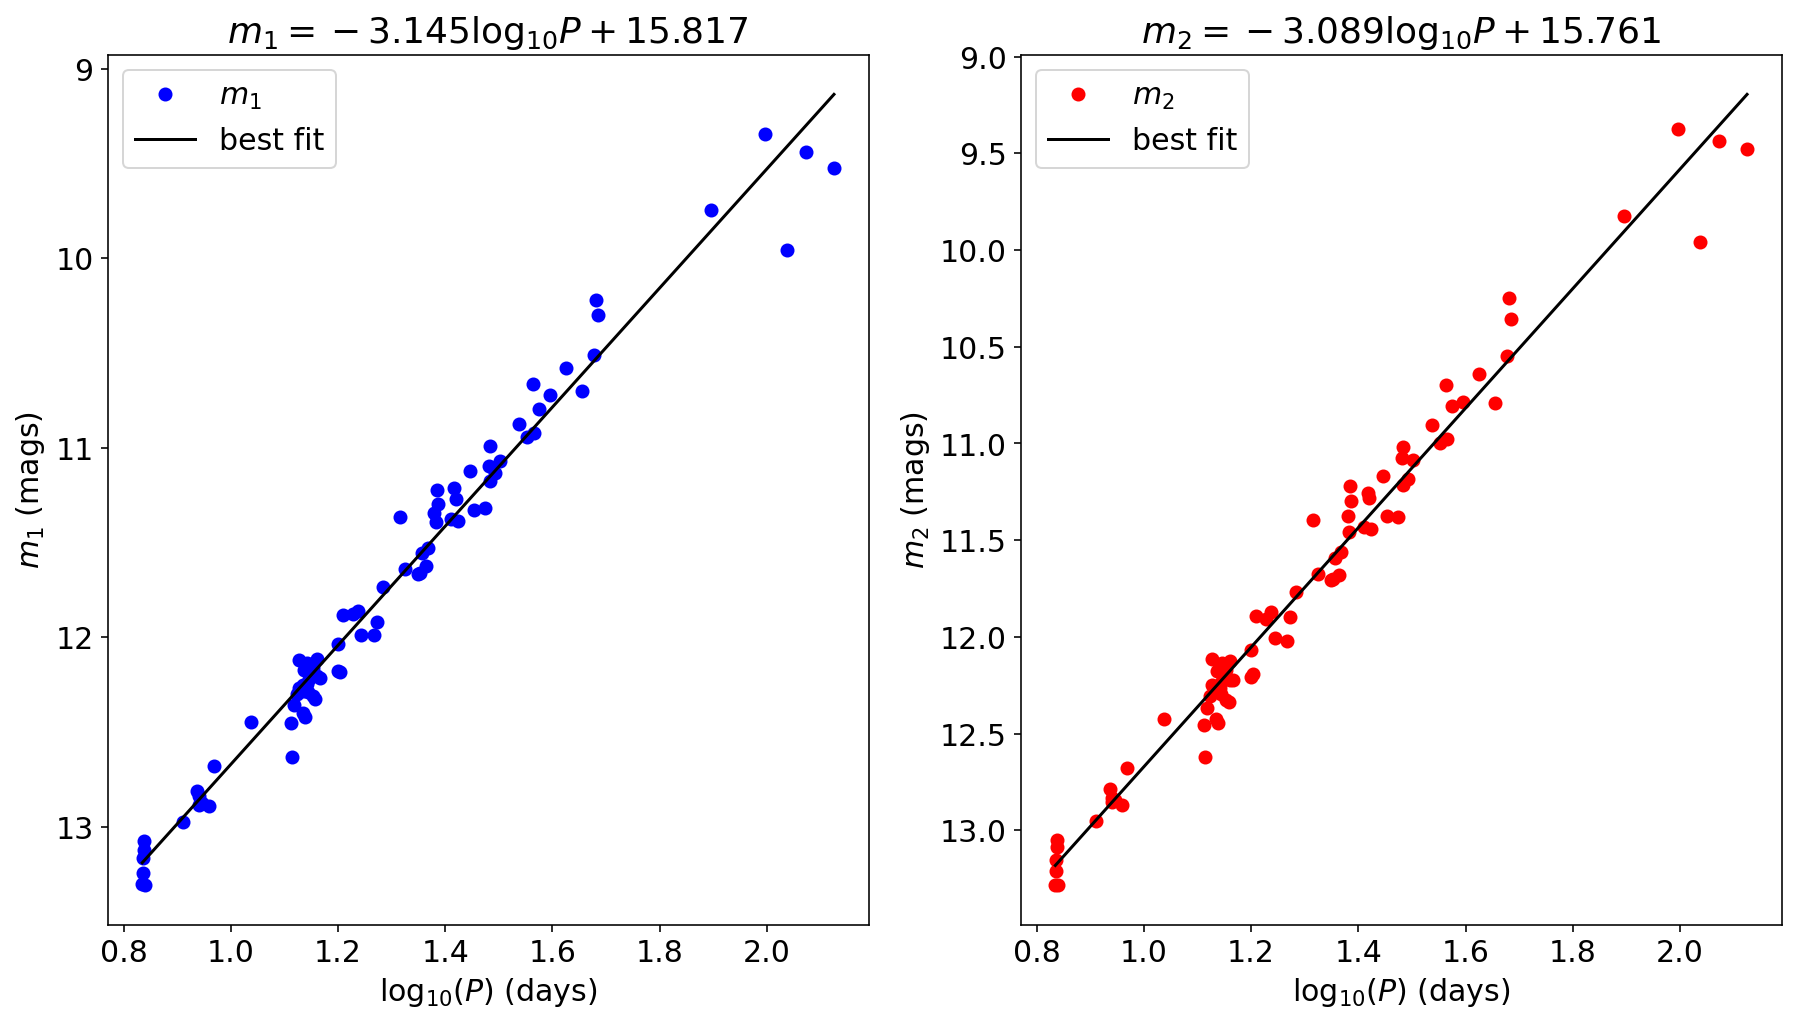

In [32]:
fig3 = plt.figure(figsize=(15,8))
ax3 = fig3.add_subplot(1,2,1)
ax4 = fig3.add_subplot(1,2,2)

p = np.linspace(lmc_df['period'].min(), lmc_df['period'].max(), 100)

ax3.plot(np.log10(lmc_df['period']), lmc_df['mag_1'], color='b', marker='o', linestyle='None', label='$m_1$')

ax4.plot(np.log10(lmc_df['period']), lmc_df['mag_2'], color='r', marker='o', linestyle='None', label='$m_2$')

ax3.plot(np.log10(p), log_p_mag(p, a1, b1), color='black', ls='-', label='best fit')
ax4.plot(np.log10(p), log_p_mag(p, a2, b2), color='black', ls='-', label='best fit')


ax3.set_xlabel('$\log_{10}(P)$ (days)')
ax3.set_ylabel('$m_1$ (mags)')
ax4.set_xlabel('$\log_{10}(P)$ (days)')
ax4.set_ylabel('$m_2$ (mags)')
ax3.legend()
ax4.legend()

ax3.invert_yaxis()
ax4.invert_yaxis()

ax3.set_title("$m_1 = {0:.3f} \log_{{10}} P + {1:.3f}$".format(a1, b1))
ax4.set_title("$m_2 = {0:.3f} \log_{{10}} P + {1:.3f}$".format(a2, b2))



plt.savefig("two_PLs.jpg", dpi=300)
plt.show()
